# Post procesamiento de imágenes utilizando GANs
Thin Structure Inpainting

In [3]:
!git clone https://github.com/ciraionut/Thin-Structure-Inpainting.git

Cloning into 'Thin-Structure-Inpainting'...
remote: Enumerating objects: 176, done.
remote: Counting objects: 100% (176/176), done.
remote: Compressing objects: 100% (128/128), done.
remote: Total 176 (delta 79), reused 135 (delta 44), pack-reused 0
Receiving objects: 100% (176/176), 355.05 KiB | 0 bytes/s, done.
Resolving deltas: 100% (79/79), done.


In [4]:
%cd Thin-Structure-Inpainting/

/home/cartobot/Documentos/Postprocesamiento/reentrenamiento/Thin-Structure-Inpainting


In [ ]:
!mkdir -p /Thin-Structure-Inpainting/data/road/test/
!mkdir -p /Thin-Structure-Inpainting/data/road/valid/
!mkdir -p /Thin-Structure-Inpainting/data/road/train/

In [29]:
#unzip "train.zip"
#!mv /Thin-Structure-Inpainting/postprocessing/data/output/* /Thin-Structure-Inpainting/data/road/train/

Archive:  train.zip
replace train/5bf5eab84c57910ebc5b5e44.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [21]:
import os
cwd = os.getcwd()
cwd

'/home/jupyter/Thin-Structure-Inpainting'

In [13]:
import os, shutil
files = os.listdir(r'data/road/train')[:100]

for file in files:
  shutil.move(r'data/road/train/'+file,'data/road/valid')

files = os.listdir(r'data/road/train')[:10]

for file in files:
  shutil.move(r'data/road/train/'+file, 'data/road/test')

In [9]:
%cd Thin-Structure-Inpainting/
!pip install -r requirements.txt #--ignore-installed

[Errno 2] No such file or directory: 'Thin-Structure-Inpainting/'
/home/jupyter/Thin-Structure-Inpainting
  Using cached terminado-0.8.1-py2.py3-none-any.whl (33 kB)
ERROR: jupyter-http-over-ws 0.0.7 requires enum34~=1.1, which is not installed.
ERROR: jupyterlab-server 1.0.7 has requirement jsonschema>=3.0.1, but you'll have jsonschema 2.6.0 which is incompatible.
  Attempting uninstall: terminado
    Found existing installation: terminado 0.8.3
ERROR: Cannot uninstall 'terminado'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


In [10]:
!pip install torchgan

In [11]:
!pip install tqdm
!pip install pandas

In [12]:
!pip install tensorboardx

     |████████████████████████████████| 195 kB 5.0 MB/s eta 0:00:01


In [1]:
import torch 
print(torch.__version__)

1.0.1.post2


In [1]:
#!cp -r /content/Thin-Structure-Inpainting/saved/Road/0310_204112 /content/drive/My\ Drive
%cd Thin-Structure-Inpainting/
!python train.py -c configs/road_config.json

/home/jupyter/Thin-Structure-Inpainting
Unet(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(1, 1), stride=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (conv_block_2): Sequential(
    (0): ReflectionPad2d((1, 1, 1, 1))
    (1): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2))
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU()
  )
  (conv_block_3): Sequential(
    (0): ReflectionPad2d((1, 1, 1, 1))
    (1): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU()
  )
  (conv_block_4): Sequential(
    (0): ReflectionPad2d((1, 1, 1, 1))
    (1): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2))
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU()
  )
  (conv_block_5): Sequential(
    (0): Refle

## Testing

In [4]:
!pip install --upgrade scikit-image

Requirement already up-to-date: scikit-image in /opt/conda/lib/python3.7/site-packages (0.16.2)


Trainable parameters: 6139582
Unet(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(1, 1), stride=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (conv_block_2): Sequential(
    (0): ReflectionPad2d((1, 1, 1, 1))
    (1): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2))
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU()
  )
  (conv_block_3): Sequential(
    (0): ReflectionPad2d((1, 1, 1, 1))
    (1): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU()
  )
  (conv_block_4): Sequential(
    (0): ReflectionPad2d((1, 1, 1, 1))
    (1): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2))
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU()
  )
  (conv_block_5): Sequential(
    (0): ReflectionPad2d

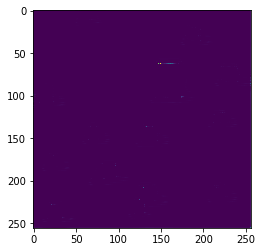

In [12]:
import data_loader.data_loaders as module_data
from matplotlib import pyplot as plt
import os
import argparse
import torch
from eval.final_evaluator import UnetEvaluator
import model.unet_model as module_arch
from train import get_instance

n_gpu = torch.cuda.device_count()
device = torch.device('cuda:0' if n_gpu > 0 else 'cpu')

cp = "r'gan'/Road/0329_113410/model_best.pth"
config = torch.load(cp, map_location=device)['config']
resume = cp

model = get_instance(module_arch, 'generator_arch', config)
model.summary()

# load state dict
checkpoint = torch.load(resume, map_location='cpu')
state_dict = checkpoint['generator_state_dict']
model.load_state_dict(state_dict)

# prepare model for testing
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
#model.eval()

def get_instance(module, name, config, *args):
    return getattr(module, config[name]['type'])(*args, **config[name]['args'])

# setup data_loader instances
#train_data_loader = get_instance(module_data, 'train_data_loader', config)
valid_data_loader = get_instance(module_data, 'valid_data_loader', config)

for batch_idx, (inputs, targets, _, _, _, _) in enumerate(valid_data_loader):
  a = model.inference(inputs)

%matplotlib inline

test = a[0].cpu().detach().numpy()[0,:]
plt.imshow(test, interpolation='nearest')
plt.show()